**Analisando correla√ß√£o entre os atributos**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


*Leitura do Arquivo*

In [2]:
#Leitura do arquivo
df = pd.read_pickle('../../df_filtrado.pickle')



In [7]:
df.head()

AP_PRIPAL AP_UFMUN        AP_CNSPCN  AP_NUIDADE AP_SEXO  \
918696    0304040029       SP  |{{~~√º|}|√§~{{{√¢          72       F   
1073812   0304040029       SP  |{{~~√º|}|√§~{{{√¢          72       F   
397157    0304040029       ES  |{{~√©{√¢√¢|√º{{{√á          70       F   
408520    0304040185       ES  |{{~√©{√¢√¢|√º{{{√á          71       F   
13567415  0304040029       RJ  |{{|√©√¢√á{{{√á          60       F   

          AP_RACACOR AP_MUNPCN AP_UFNACIO   AP_DTINIC    AP_DTFIM  ...  \
918696             1        SP     Brasil  29/05/2009  31/07/2009  ...   
1073812            1        SP     Brasil  10/11/2009  31/01/2010  ...   
397157             3        ES     Brasil  15/06/2021  31/08/2021  ...   
408520             3        ES     Brasil  08/09/2021  30/11/2021  ...   
13567415           2        RJ     Brasil  01/07/2010  30/09/2010  ...   

          FULVESTRANTO  VINORELBINA GENCITABINA GOSSERELINA PAMIDRONATO  \
918696               0            0           0           0           0   
1073812              0            0           0           0           0   
397157               0            0           0           0           0   
408520               0            0           0           0           0   
13567415             0            0           0           0           0   

          PERTUZUMABE CISPLATINA LEUPRORRELINA ABREVIATURA_PROTOCOLO  \
918696              0          0             0                   DOX   
1073812             0          0             0                   PTX   
397157              0          0             0                   CFX   
408520              0          0             0                   DTX   
13567415            0          0             0           DOX+CFX+5FU   

         Total_Medicamentos  
918696                    1  
1073812                   1  
397157                    1  
408520                    1  
13567415                  3  

[5 rows x 58 columns]

In [8]:
df.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'DESFECHO', 'CODIGO_6D', 'PACLITAXEL',
       'DOXORRUBICINA', 'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO',
       'EPIRRUBICINA', 'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO',
       'CAPECITABINA', 'LETROZOL', 'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO',
       'FULVESTRANTO', 'VINORELBINA', 'GENCITABINA', 'GOSSERELINA',
       'PAMIDRONATO', 'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'ABRE

*Convertendo campos de data para timestamp para poder fazer correla√ß√£o*

In [3]:
# Convertendo a coluna de data para o tipo datetime
df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
df['INICIO'] = pd.to_datetime(df['INICIO'], errors='coerce')
df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')



# Convertendo a data para um timestamp num√©rico
df['AP_DTINIC'] = df['AP_DTINIC'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['AP_DTFIM'] = df['AP_DTFIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['INICIO'] = df['INICIO'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['FIM'] = df['FIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)




C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\3041570925.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\3041570925.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\3041570925.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')


In [4]:
# Ordena os casos por cns e data de fim (mais recentes por √∫ltimo)
df_ordenado = df.sort_values(by=['AP_CNSPCN', 'AP_DTFIM'])

# Pega o √∫ltimo caso de cada cns (o mais recente)
df_ultimos_casos = df_ordenado.groupby('AP_CNSPCN').tail(1)


df_ultimos_casos['AP_CNSPCN'].is_unique
print(f"Quantidade de valores √∫nicos na coluna cns: {df_ultimos_casos['AP_CNSPCN'].is_unique}")



Quantidade de valores √∫nicos na coluna cns: True


In [11]:
qtd_alta = (df_ultimos_casos['DESFECHO'] == 'Alta').sum()
print(f"Quantidade de Altas: {qtd_alta}")

total_linhas = len(df_ultimos_casos)
print(f"Total de linhas: {total_linhas}")

porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Alta').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Altas: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Melhora').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Melhoras: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == '√ìbito').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de √ìbitos: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Piora').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Piora: {porcentagem_alta:.2f}%")
df_ultimos_casos['DESFECHO'].isnull().sum()
print(f"Quantidade de valores nulos na coluna DESFECHO: {df_ultimos_casos['DESFECHO'].isnull().sum()}")

df_ultimos_casos['AP_CNSPCN'].is_unique
print(f"Quantidade de valores √∫nicos na coluna cns: {df_ultimos_casos['AP_CNSPCN'].is_unique}")

Quantidade de Altas: 13823
Total de linhas: 53743
Porcentagem de Altas: 25.72%
Porcentagem de Melhoras: 24.84%
Porcentagem de √ìbitos: 7.61%
Porcentagem de Piora: 41.82%
Quantidade de valores nulos na coluna DESFECHO: 0
Quantidade de valores √∫nicos na coluna cns: True


In [12]:
df_sem_altas = df[df['DESFECHO'] != 'Alta']

In [13]:
import pickle

dados_sem_alta = pickle.dumps(df)
with open('../../dados_sem_alta.pickle', 'wb') as arquivo:
    arquivo.write(dados_sem_alta)

*Trasnformando Vari√°vel Categ√≥rica em Num√©rica*

In [14]:
import numpy as np


def valor_desfecho(desfecho):
    if(desfecho=='Melhora'):
        return 1
    elif(desfecho=='Piora'):
        return 0
    elif(desfecho=='√ìbito'):
        return 0


df_sem_altas['VALOR_DESFECHO'] = np.vectorize(valor_desfecho)(df_sem_altas['DESFECHO'])
df_sem_altas['VALOR_DESFECHO'].value_counts()
df_analise_valor = df_sem_altas.drop('DESFECHO', axis=1)

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\2033463406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_altas['VALOR_DESFECHO'] = np.vectorize(valor_desfecho)(df_sem_altas['DESFECHO'])


In [15]:
porcentagem_favoravel = (df_sem_altas['VALOR_DESFECHO'] == 1).sum() / len(df_sem_altas) * 100
print(f"Porcentagem de Favor√°veis: {porcentagem_favoravel:.2f}%")
porcentagem_desfavoravel = (df_sem_altas['VALOR_DESFECHO'] == 0).sum() / len(df_sem_altas) * 100
print(f"Porcentagem de Desfavoraveis: {porcentagem_desfavoravel:.2f}%")

Porcentagem de Favor√°veis: 33.86%
Porcentagem de Desfavoraveis: 66.14%


In [16]:
import pickle

dados_sem_altas = pickle.dumps(df_sem_altas)
with open('../../dados_sem_alta_favoravel_desfavoravel.pickle', 'wb') as arquivo:
    arquivo.write(dados_sem_altas)

In [16]:
df_analise_valor.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'CODIGO_6D', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA', 'ABREVIATURA_PROTOCOLO',

*Usando One-Hot Encoding nas colunas de Localidade*

In [17]:
# Usando pd.get_dummies para fazer One-Hot Encoding
df_analise = pd.get_dummies(df_analise_valor, columns=['AP_UFMUN'], drop_first=False)

# Verificando se existem NaN nas colunas de One-Hot Encoding
print(df_analise.isna().sum())

# Preenchendo NaN com 0 antes de converter para inteiro
df_analise.fillna(0, inplace=True)

# Lista das colunas criadas pelo One-Hot Encoding
one_hot_columns = ['AP_UFMUN_ES', 'AP_UFMUN_MG', 'AP_UFMUN_RJ', 'AP_UFMUN_SP']

# Convertendo as colunas One-Hot Encoding para inteiros
df_analise[one_hot_columns] = df_analise[one_hot_columns].astype(int)

# Mostrando o DataFrame resultante
print(df_analise)


AP_PRIPAL         0
AP_CNSPCN         0
AP_NUIDADE        0
AP_SEXO           0
AP_RACACOR        0
                 ..
VALOR_DESFECHO    0
AP_UFMUN_ES       0
AP_UFMUN_MG       0
AP_UFMUN_RJ       0
AP_UFMUN_SP       0
Length: 61, dtype: int64
           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~√º|}|√§~{{{√¢          72       F           1   
1073812   0304040029  |{{~~√º|}|√§~{{{√¢          72       F           1   
397157    0304040029  |{{~√©{√¢√¢|√º{{{√á          70       F           3   
408520    0304040185  |{{~√©{√¢√¢|√º{{{√á          71       F           3   
13567415  0304040029  |{{|√©√¢√á{{{√á          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  √©{√º√º{√§√á|√º√§}√¢|{          44       F           1   
14073573  0304040029  √©{√º√º{√§√á|√º√§}√¢|{          44       F           1   
5341562   0304040029  √©{√º√º{√§√á√¢√º~√á√á|{          38    

In [18]:
# Verificando os valores √∫nicos na coluna 'PROCEDIMENTO_INICIAL'
valores_unicos = df_analise['AP_PRIPAL'].unique()
print(f'Valores √∫nicos na coluna AP_PRIPAL: {valores_unicos}')

df_analise_valor = df_analise


Valores √∫nicos na coluna AP_PRIPAL: ['0304040029' '0304040185' '0304040037' '0304040193' '0304040088'
 '0304040150' '0304040010' '0304040142' '0304040070']


In [19]:
# Certifique-se de que as colunas est√£o corretamente selecionadas
df_encoded = pd.get_dummies(df_analise_valor['AP_PRIPAL'], prefix='AP_PRIPAL', drop_first=False)

# Concatenando as novas colunas com o DataFrame original
df_analise_valor = pd.concat([df_analise_valor, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise_valor)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~√º|}|√§~{{{√¢          72       F           1   
1073812   0304040029  |{{~~√º|}|√§~{{{√¢          72       F           1   
397157    0304040029  |{{~√©{√¢√¢|√º{{{√á          70       F           3   
408520    0304040185  |{{~√©{√¢√¢|√º{{{√á          71       F           3   
13567415  0304040029  |{{|√©√¢√á{{{√á          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  √©{√º√º{√§√á|√º√§}√¢|{          44       F           1   
14073573  0304040029  √©{√º√º{√§√á|√º√§}√¢|{          44       F           1   
5341562   0304040029  √©{√º√º{√§√á√¢√º~√á√á|{          38       F           2   
6142175   0304040029  √©{√º√º{√º√á√¢√©√©|{          46       F           1   
408788    0304040029  √©{√º√º{√º√á√º}√º√©√©√§|{          36       F           3   

         AP_MUNPCN AP_UFNACIO     AP_DTINIC      AP_DTFIM  A

In [20]:
# Certifique-se de que as colunas est√£o corretamente selecionadas
df_encoded = pd.get_dummies(df_analise_valor['PROCEDIMENTO_INICIAL'], prefix='PROCEDIMENTO_INICIAL')

# Concatenando as novas colunas com o DataFrame original
df_analise = pd.concat([df_analise_valor, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~√º|}|√§~{{{√¢          72       F           1   
1073812   0304040029  |{{~~√º|}|√§~{{{√¢          72       F           1   
397157    0304040029  |{{~√©{√¢√¢|√º{{{√á          70       F           3   
408520    0304040185  |{{~√©{√¢√¢|√º{{{√á          71       F           3   
13567415  0304040029  |{{|√©√¢√á{{{√á          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  √©{√º√º{√§√á|√º√§}√¢|{          44       F           1   
14073573  0304040029  √©{√º√º{√§√á|√º√§}√¢|{          44       F           1   
5341562   0304040029  √©{√º√º{√§√á√¢√º~√á√á|{          38       F           2   
6142175   0304040029  √©{√º√º{√º√á√¢√©√©|{          46       F           1   
408788    0304040029  √©{√º√º{√º√á√º}√º√©√©√§|{          36       F           3   

         AP_MUNPCN AP_UFNACIO     AP_DTINIC      AP_DTFIM  A

*Transformando colunas em num√©ricas*

In [21]:
# Caso haja mais colunas, aplique a transforma√ß√£o a elas
colunas_categoricas = ['AQ_CONTTR', 'AQ_LINFIN', 'AQ_TRANTE']  # Colunas com valores 'S' e 'N'
for col in colunas_categoricas:
    df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})




C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\2655021700.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})


In [22]:
df_analise.columns

Index(['AP_PRIPAL', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO', 'AP_RACACOR',
       'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM', 'AP_MOTSAI',
       'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN', 'AQ_ESTADI',
       'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'CODIGO_6D', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA', 'ABREVIATURA_PROTOCOLO',
       'Tot

In [23]:
# Usar to_string para evitar truncamento na visualiza√ß√£o
print(df_analise.iloc[0].to_string())


AP_PRIPAL                                 0304040029
AP_CNSPCN                            |{{~~√º|}|√§~{{{√¢
AP_NUIDADE                                        72
AP_SEXO                                            F
AP_RACACOR                                         1
AP_MUNPCN                                         SP
AP_UFNACIO                                    Brasil
AP_DTINIC                               1243555200.0
AP_DTFIM                                1248998400.0
AP_MOTSAI                                         21
AP_TRANSF                                          0
AP_CIDCAS                                       0000
AP_CIDSEC                                       C501
AQ_LINFIN                                          1
AQ_ESTADI                                          3
AQ_GRAHIS                                          2
AQ_TRANTE                                          0
AQ_CONTTR                                          1
AP_APACANT                                 

In [24]:
df_analise.dtypes

AP_PRIPAL                         object
AP_CNSPCN                         object
AP_NUIDADE                         int64
AP_SEXO                           object
AP_RACACOR                         int64
                                   ...  
PROCEDIMENTO_INICIAL_304040037      bool
PROCEDIMENTO_INICIAL_304040070      bool
PROCEDIMENTO_INICIAL_304040142      bool
PROCEDIMENTO_INICIAL_304040185      bool
PROCEDIMENTO_INICIAL_304040193      bool
Length: 86, dtype: object

**Remo√ß√£o de Atributos Altamente Correlacionados (evitar redund√¢ncia)**

In [25]:
df_matrix_clinica = df_analise[['AP_NUIDADE',
       'AP_RACACOR', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AQ_LINFIN',
       'AQ_ESTADI',  'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA',
       'TOTAL_TRATAMENTOS', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'Total_Medicamentos', 'VALOR_DESFECHO','AP_UFMUN_ES', 'AP_UFMUN_MG',
       'AP_UFMUN_RJ', 'AP_UFMUN_SP', 'AP_PRIPAL_0304040010',
       'AP_PRIPAL_0304040029', 'AP_PRIPAL_0304040037', 'AP_PRIPAL_0304040070',
       'AP_PRIPAL_0304040088', 'AP_PRIPAL_0304040142', 'AP_PRIPAL_0304040150',
       'AP_PRIPAL_0304040185', 'AP_PRIPAL_0304040193',
       'PROCEDIMENTO_INICIAL_304020133', 'PROCEDIMENTO_INICIAL_304020141',
       'PROCEDIMENTO_INICIAL_304020338', 'PROCEDIMENTO_INICIAL_304020346',
       'PROCEDIMENTO_INICIAL_304020354', 'PROCEDIMENTO_INICIAL_304020419',
       'PROCEDIMENTO_INICIAL_304020427', 'PROCEDIMENTO_INICIAL_304020435',
       'PROCEDIMENTO_INICIAL_304020443', 'PROCEDIMENTO_INICIAL_304040010',
       'PROCEDIMENTO_INICIAL_304040029', 'PROCEDIMENTO_INICIAL_304040037',
       'PROCEDIMENTO_INICIAL_304040070', 'PROCEDIMENTO_INICIAL_304040142',
       'PROCEDIMENTO_INICIAL_304040185', 'PROCEDIMENTO_INICIAL_304040193'              
]]



*Transformando colunas em tipo inteiro*

In [26]:
df_matrix_clinica['AQ_LINFIN'] = pd.to_numeric(df_matrix_clinica['AQ_LINFIN'], errors='coerce')
df_matrix_clinica['AQ_TRANTE'] = pd.to_numeric(df_matrix_clinica['AQ_TRANTE'], errors='coerce')

# Converter para inteiro
df_matrix_clinica['AQ_LINFIN'] = df_matrix_clinica['AQ_LINFIN'].astype('int')
df_matrix_clinica['AQ_TRANTE'] = df_matrix_clinica['AQ_TRANTE'].astype('int')

df_matrix_clinica.fillna(0, inplace=True)  # Preencher NaN com 0, ou use outro valor se necess√°rio


C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\3559135671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_clinica['AQ_LINFIN'] = pd.to_numeric(df_matrix_clinica['AQ_LINFIN'], errors='coerce')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\3559135671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_clinica['AQ_TRANTE'] = pd.to_numeric(df_matrix_clinica['AQ_TRANTE'], errors='coerce')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\3559135671.py:5: SettingWithCopyWarning: 

In [27]:
# Usar to_string para evitar truncamento na visualiza√ß√£o
print(df_matrix_clinica.iloc[0].to_string())

AP_NUIDADE                                     72
AP_RACACOR                                      1
AP_DTINIC                            1243555200.0
AP_DTFIM                             1248998400.0
AP_MOTSAI                                      21
AP_TRANSF                                       0
AQ_LINFIN                                       1
AQ_ESTADI                                       3
AQ_TRANTE                                       0
AQ_CONTTR                                       1
AP_APACANT                                      0
NUMERO_DE_TRATAMENTOS_ANTERIORES                0
NUMERO_DE_DIAGNOSTICOS_DIFERENTES               1
TEM_CAUSAS_ASSOCIADAS                           1
TEM_CAUSAS_SECUNDARIA                           1
TOTAL_TRATAMENTOS                               2
PACLITAXEL                                      0
DOXORRUBICINA                                   1
CICLOFOSFAMIDA                                  0
FLUOROURACILA                                   0


*Matriz de Correla√ß√£o*

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\410573254.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_matrix = corr_matrix.replace({True: 1, False: 0})


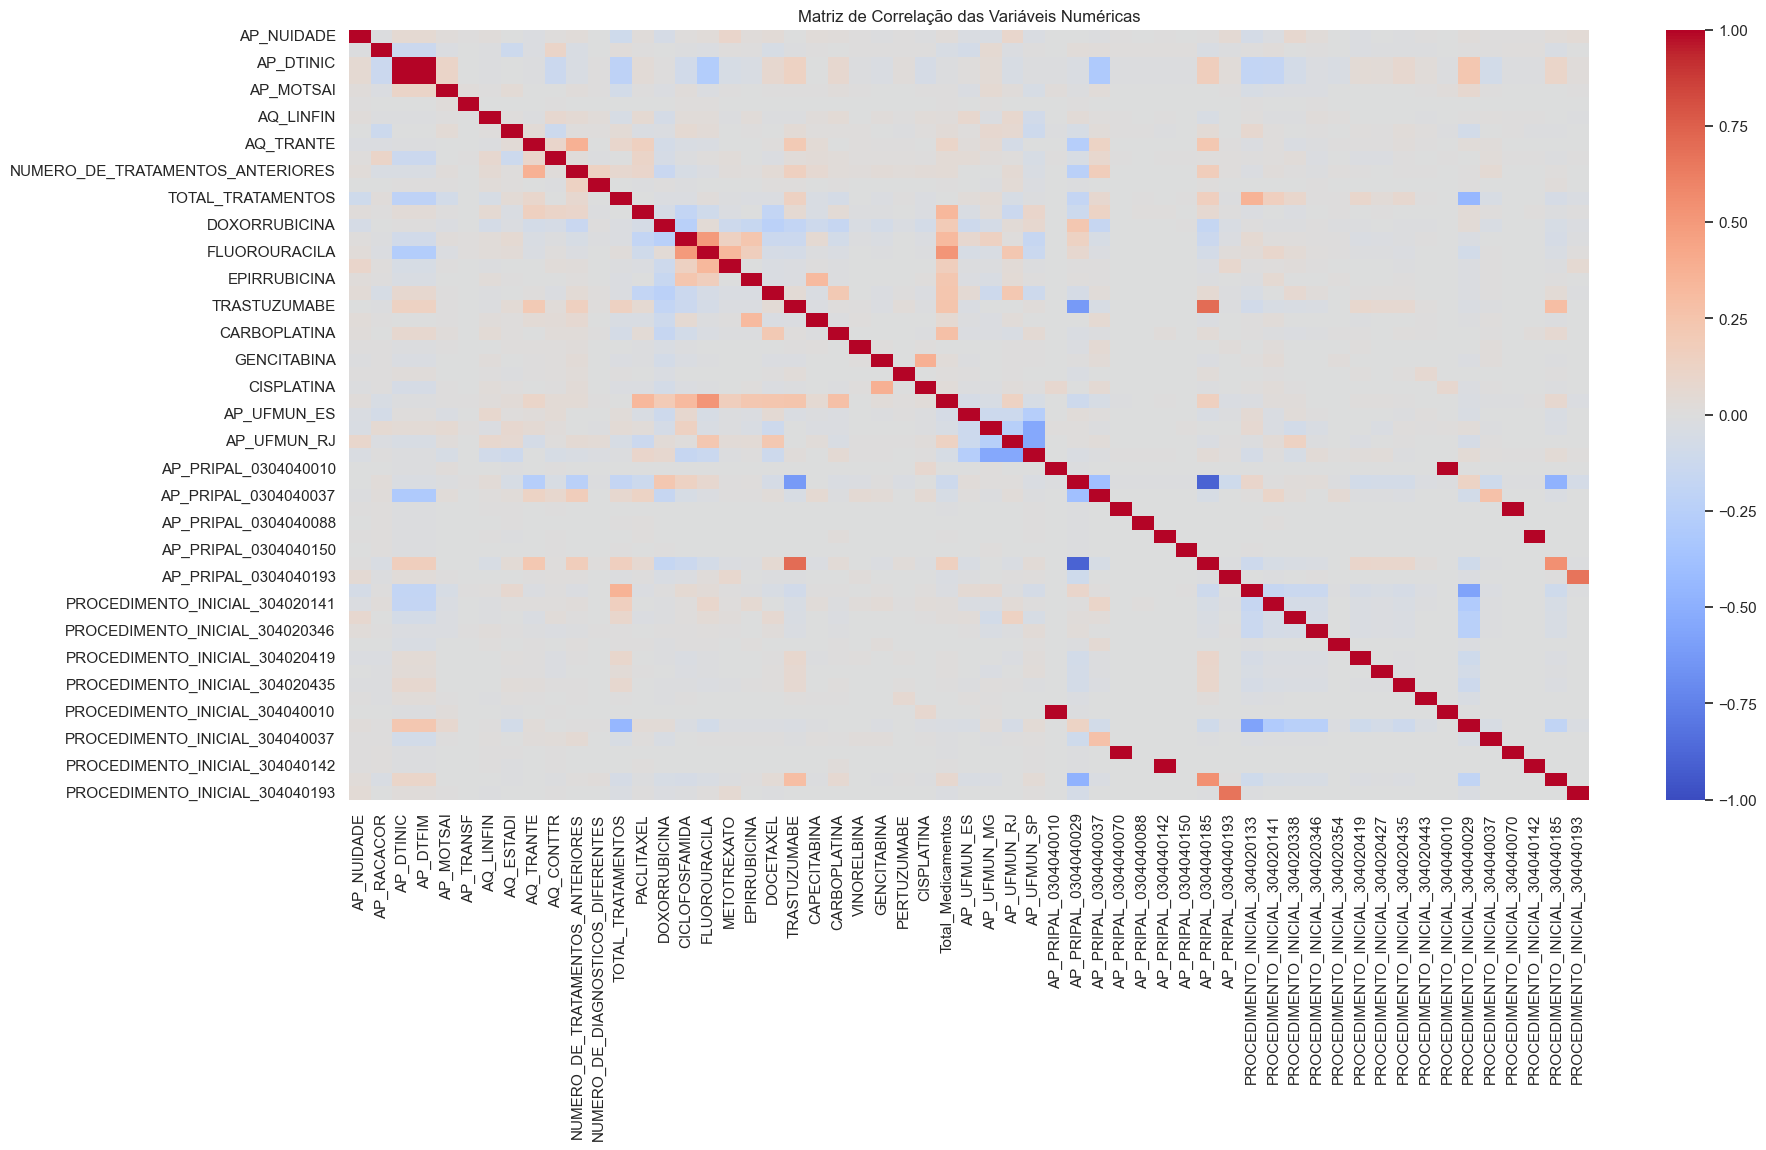

In [222]:
corr_matrix = df_matrix_clinica.drop(columns=['VALOR_DESFECHO']) 

# Converte True/False para 1/0 antes da sele√ß√£o num√©rica
corr_matrix = corr_matrix.replace({True: 1, False: 0})

# Manter apenas colunas num√©ricas
numeric_df = corr_matrix.select_dtypes(include=['number'])

# Remover colunas com desvio padr√£o zero
numeric_df = numeric_df.loc[:, numeric_df.std() != 0]

# Calcular a matriz de correla√ß√£o
corr = numeric_df.corr()

# Remover linhas/colunas completamente NaN (opcional)
corr = corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plotar
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()


In [223]:
# Colunas num√©ricas antes do filtro
all_numeric = corr_matrix.select_dtypes(include=['number']).columns

# Colunas mantidas ap√≥s remo√ß√£o de constantes
filtered_numeric = numeric_df.columns

# Colunas exclu√≠das
excluded = list(set(all_numeric) - set(filtered_numeric))
print("Colunas exclu√≠das por serem constantes:", excluded)


Colunas exclu√≠das por serem constantes: ['FULVESTRANTO', 'TAMOXIFENO', 'LEUPRORRELINA', 'EXEMESTANO', 'GOSSERELINA', 'PAMIDRONATO', 'TEM_CAUSAS_ASSOCIADAS', 'ANASTROZOL', 'LETROZOL', 'TEM_CAUSAS_SECUNDARIA']


Ganho de informa√ß√£o

In [224]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Separa features (X) e alvo (y)
X = df_matrix_clinica.drop('VALOR_DESFECHO', axis=1).copy()
y = df_matrix_clinica['VALOR_DESFECHO']

# Codifica vari√°veis categ√≥ricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Calcula o ganho de informa√ß√£o 
importancias = mutual_info_classif(X, y, discrete_features=True)

# Cria um DataFrame com os resultados
importancia_df = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Ganho de Informa√ß√£o': importancias
}).sort_values(by='Ganho de Informa√ß√£o', ascending=False)

print(importancia_df)


                          Vari√°vel  Ganho de Informa√ß√£o
2                        AP_DTINIC             0.133705
3                         AP_DTFIM             0.081988
62  PROCEDIMENTO_INICIAL_304040029             0.039949
42                     AP_UFMUN_SP             0.028414
40                     AP_UFMUN_MG             0.023372
..                             ...                  ...
30                    FULVESTRANTO             0.000000
26                        LETROZOL             0.000000
24                      TAMOXIFENO             0.000000
27                      ANASTROZOL             0.000000
37                   LEUPRORRELINA             0.000000

[68 rows x 2 columns]


In [225]:
print(importancia_df.to_string())


                             Vari√°vel  Ganho de Informa√ß√£o
2                           AP_DTINIC         1.337050e-01
3                            AP_DTFIM         8.198776e-02
62     PROCEDIMENTO_INICIAL_304040029         3.994864e-02
42                        AP_UFMUN_SP         2.841442e-02
40                        AP_UFMUN_MG         2.337221e-02
52     PROCEDIMENTO_INICIAL_304020133         2.116933e-02
10                         AP_APACANT         1.817536e-02
15                  TOTAL_TRATAMENTOS         1.589978e-02
4                           AP_MOTSAI         1.551393e-02
7                           AQ_ESTADI         1.347203e-02
53     PROCEDIMENTO_INICIAL_304020141         9.824476e-03
19                      FLUOROURACILA         3.304003e-03
38                 Total_Medicamentos         2.668605e-03
41                        AP_UFMUN_RJ         2.596363e-03
55     PROCEDIMENTO_INICIAL_304020346         2.105357e-03
1                          AP_RACACOR         1.84670

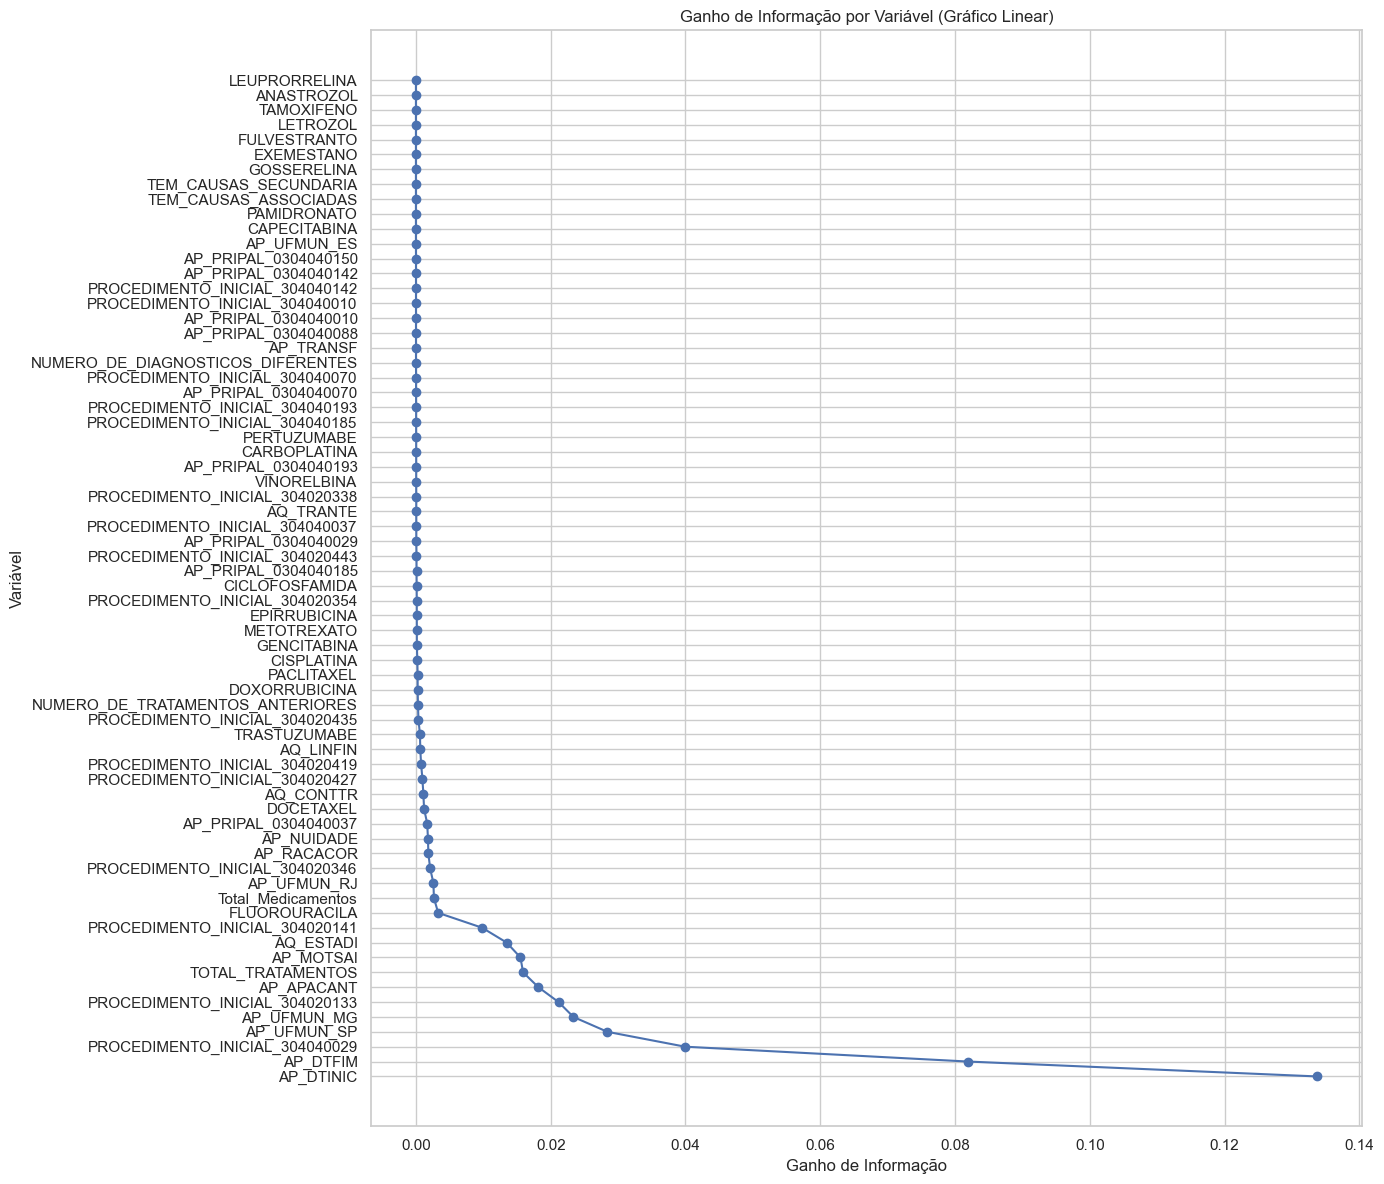

In [226]:


plt.figure(figsize=(14, 12))
plt.plot(importancia_df['Ganho de Informa√ß√£o'], importancia_df['Vari√°vel'], marker='o', linestyle='-')
plt.xlabel('Ganho de Informa√ß√£o')
plt.ylabel('Vari√°vel')
plt.title('Ganho de Informa√ß√£o por Vari√°vel (Gr√°fico Linear)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [227]:
from sklearn.preprocessing import StandardScaler


# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(corr_matrix)



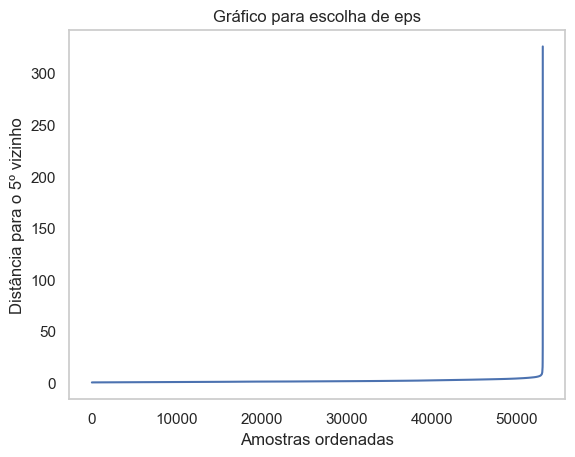

In [228]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])  # 5¬∫ vizinho
plt.plot(distances)
plt.title("Gr√°fico para escolha de eps")
plt.xlabel("Amostras ordenadas")
plt.ylabel("Dist√¢ncia para o 5¬∫ vizinho")
plt.grid()
plt.show()


In [229]:
from kneed import KneeLocator

knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
print(f"eps sugerido pelo KneeLocator: {distances[knee.knee]:.2f}")


eps sugerido pelo KneeLocator: 9.04


In [149]:
from sklearn.decomposition import PCA

# Reduz para 10 dimens√µes
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


In [150]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=9.04, min_samples=10)
labels = dbscan.fit_predict(X_pca)


In [151]:
import numpy as np

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = np.sum(labels == -1)

print(f"N√∫mero de clusters encontrados: {n_clusters}")
print(f"N√∫mero de outliers: {n_outliers}")


N√∫mero de clusters encontrados: 3
N√∫mero de outliers: 3


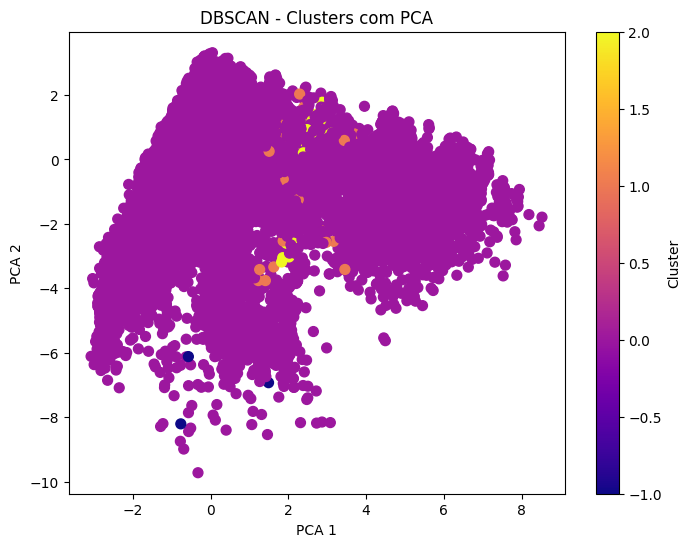

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN - Clusters com PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [156]:
# Lista das 12 vari√°veis mais importantes
variaveis_mais_importantes = [
    'AP_DTINIC',
    'AP_DTFIM',
    'PROCEDIMENTO_INICIAL_304040029',
    'AP_UFMUN_SP',
    'AP_UFMUN_MG',
    'PROCEDIMENTO_INICIAL_304020133',
    'AP_APACANT',
    'TOTAL_TRATAMENTOS',
    'AP_MOTSAI',
    'AQ_ESTADI',
    'PROCEDIMENTO_INICIAL_304020141',
    'FLUOROURACILA'
]

# Remove 'VALOR_DESFECHO' e filtra apenas as vari√°veis importantes
X_filtrado = df_matrix_clinica.drop(columns=['VALOR_DESFECHO'])[variaveis_mais_importantes].copy()

# Verifica
print("Shape final:", X_filtrado.shape)
print("Colunas selecionadas:", X_filtrado.columns.tolist())


Shape final: (53104, 12)
Colunas selecionadas: ['AP_DTINIC', 'AP_DTFIM', 'PROCEDIMENTO_INICIAL_304040029', 'AP_UFMUN_SP', 'AP_UFMUN_MG', 'PROCEDIMENTO_INICIAL_304020133', 'AP_APACANT', 'TOTAL_TRATAMENTOS', 'AP_MOTSAI', 'AQ_ESTADI', 'PROCEDIMENTO_INICIAL_304020141', 'FLUOROURACILA']


In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtrado)

In [158]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled_filtered)
distances, indices = nbrs.kneighbors(X_scaled_filtered)

distances = np.sort(distances[:, 4])  # 5¬∫ vizinho
plt.plot(distances)
plt.title("Gr√°fico para escolha de eps")
plt.xlabel("Amostras ordenadas")
plt.ylabel("Dist√¢ncia para o 5¬∫ vizinho")
plt.grid()
plt.show()


In [159]:
from kneed import KneeLocator

knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
print(f"eps sugerido pelo KneeLocator: {distances[knee.knee]:.2f}")


eps sugerido pelo KneeLocator: 3.01


In [230]:
from sklearn.cluster import DBSCAN
import numpy as np

def testar_parametros_dbscan(X, eps_values, min_samples_values):
    """
    Testa diferentes combina√ß√µes de eps e min_samples para DBSCAN.

    Par√¢metros:
        X: ndarray ou DataFrame (j√° escalado!)
        eps_values: lista de valores de eps (ex: [2.5, 3.0, 3.5])
        min_samples_values: lista de min_samples (ex: [5, 10, 15])
    """
    print(f"{'eps':<6} {'min_samples':<12} {'clusters':<10} {'outliers'}")
    print("-" * 40)
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_outliers = list(labels).count(-1)
            
            print(f"{eps:<6.2f} {min_samples:<12} {n_clusters:<10} {n_outliers}")


In [165]:
# Supondo que voc√™ j√° tenha X_scaled_filtered
eps_testes = [2.5, 3.0, 3.5, 4.0]
min_samples_testes = [5, 10, 15]

testar_parametros_dbscan(X_scaled_filtered, eps_testes, min_samples_testes)


eps    min_samples  clusters   outliers
----------------------------------------
2.50   5            13         25
2.50   10           10         57
2.50   15           8          89
3.00   5            12         9
3.00   10           12         16
3.00   15           8          62
3.50   5            12         5
3.50   10           11         10
3.50   15           8          53
4.00   5            5          1
4.00   10           4          6
4.00   15           4          7


In [234]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4.00, min_samples=10)
labels = dbscan.fit_predict(X_scaled_filtered)


In [235]:
import numpy as np

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = np.sum(labels == -1)

print(f"N√∫mero de clusters encontrados: {n_clusters}")
print(f"N√∫mero de outliers: {n_outliers}")


N√∫mero de clusters encontrados: 4
N√∫mero de outliers: 6


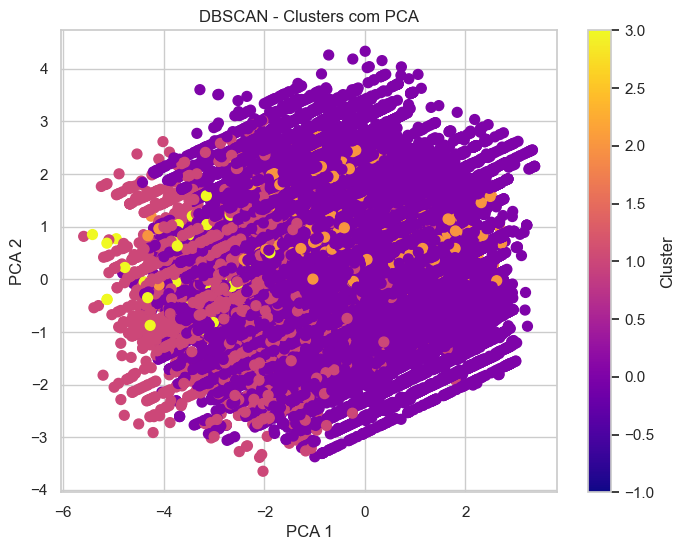

In [236]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN - Clusters com PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


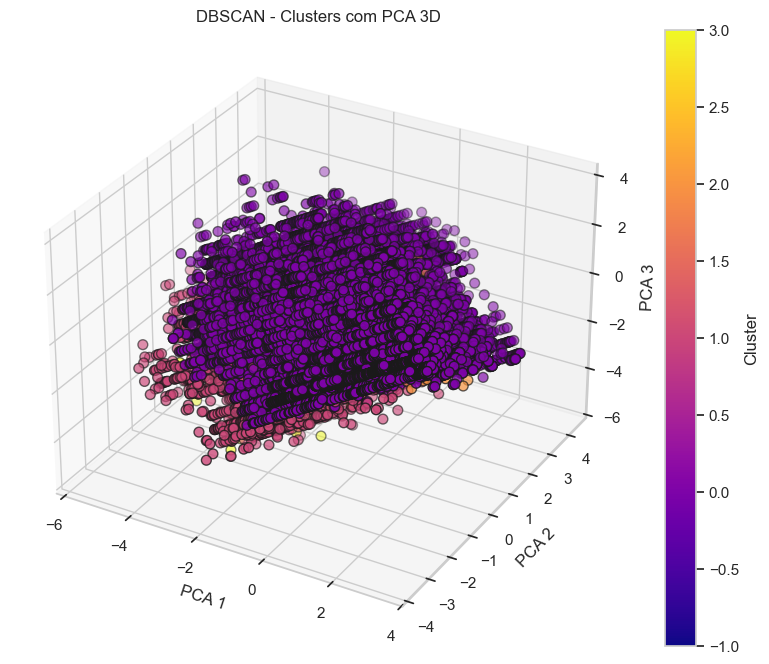

In [237]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA com 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_filtered)

# Gr√°fico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=labels,
    cmap='plasma',
    s=50,
    edgecolor='k'
)

ax.set_title("DBSCAN - Clusters com PCA 3D")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
fig.colorbar(scatter, label="Cluster")
plt.show()


In [238]:
import plotly.express as px
import pandas as pd

# Supondo que labels e X_pca j√° est√£o definidos
df_plot = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'PCA3': X_pca[:, 2],
    'cluster': labels.astype(str)  # converte pra string pra ficar como categoria
})

fig = px.scatter_3d(
    df_plot, x='PCA1', y='PCA2', z='PCA3',
    color='cluster',
    title='DBSCAN - Clusters com PCA 3D',
    labels={'cluster': 'Cluster'},
    opacity=0.8,
    width=800,
    height=600
)

fig.show()


In [174]:
# Lista das vari√°veis + alvo + cluster
colunas_final = variaveis_mais_importantes + ['VALOR_DESFECHO']

# Cria novo DataFrame com apenas as colunas desejadas
df_com_cluster = df_matrix_clinica[colunas_final].copy()

# Adiciona a coluna com os r√≥tulos de cluster
df_com_cluster['cluster'] = labels

# Verifica
print(df_com_cluster.head())


             AP_DTINIC      AP_DTFIM  PROCEDIMENTO_INICIAL_304040029  \
918696    1.243555e+09  1.248998e+09                            True   
1073812   1.257811e+09  1.264896e+09                            True   
397157    1.623715e+09  1.630368e+09                            True   
408520    1.631059e+09  1.638230e+09                            True   
13567415  1.277942e+09  1.285805e+09                           False   

          AP_UFMUN_SP  AP_UFMUN_MG  PROCEDIMENTO_INICIAL_304020133 AP_APACANT  \
918696              1            0                           False          0   
1073812             1            0                           False          0   
397157              0            0                           False          0   
408520              0            0                           False          0   
13567415            0            0                           False          0   

          TOTAL_TRATAMENTOS  AP_MOTSAI  AQ_ESTADI  \
918696                    2

In [175]:
# Lista das colunas de procedimentos
colunas_procedimentos = [col for col in df_com_cluster.columns if col.startswith('PROCEDIMENTO_INICIAL_')]

# Calcula a propor√ß√£o (m√©dia) de pacientes com cada procedimento, por cluster
resumo_procedimentos_por_cluster = df_com_cluster.groupby('cluster')[colunas_procedimentos].mean() * 100

# Arredonda para facilitar leitura
resumo_procedimentos_por_cluster = resumo_procedimentos_por_cluster.round(1)

# Mostra
print(resumo_procedimentos_por_cluster)


         PROCEDIMENTO_INICIAL_304040029  PROCEDIMENTO_INICIAL_304020133  \
cluster                                                                   
-1                                  0.0                             0.0   
 0                                 51.8                            23.7   
 1                                 32.5                            31.2   
 2                                 39.5                            20.4   
 3                                 28.3                            33.3   

         PROCEDIMENTO_INICIAL_304020141  
cluster                                  
-1                                100.0  
 0                                  7.0  
 1                                 17.8  
 2                                 13.0  
 3                                 20.0  


In [176]:
# Para cada cluster, mostra os procedimentos com maior propor√ß√£o
for cluster_id, linha in resumo_procedimentos_por_cluster.iterrows():
    print(f"\nüìä Cluster {cluster_id} ‚Äî Procedimentos mais frequentes:")
    print(linha.sort_values(ascending=False).head(5))



üìä Cluster -1 ‚Äî Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304020141    100.0
PROCEDIMENTO_INICIAL_304040029      0.0
PROCEDIMENTO_INICIAL_304020133      0.0
Name: -1, dtype: float64

üìä Cluster 0 ‚Äî Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304040029    51.8
PROCEDIMENTO_INICIAL_304020133    23.7
PROCEDIMENTO_INICIAL_304020141     7.0
Name: 0, dtype: float64

üìä Cluster 1 ‚Äî Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304040029    32.5
PROCEDIMENTO_INICIAL_304020133    31.2
PROCEDIMENTO_INICIAL_304020141    17.8
Name: 1, dtype: float64

üìä Cluster 2 ‚Äî Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304040029    39.5
PROCEDIMENTO_INICIAL_304020133    20.4
PROCEDIMENTO_INICIAL_304020141    13.0
Name: 2, dtype: float64

üìä Cluster 3 ‚Äî Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304020133    33.3
PROCEDIMENTO_INICIAL_304040029    28.3
PROCEDIMENTO_INICIAL_304020141    20.0
Name: 3, dtype: float64


In [177]:
# Estat√≠sticas b√°sicas por cluster
resumo_desfecho = df_com_cluster.groupby('cluster')['VALOR_DESFECHO'].describe().round(2)

print(resumo_desfecho)


           count  mean   std  min   25%  50%  75%  max
cluster                                               
-1           6.0  0.67  0.52  0.0  0.25  1.0  1.0  1.0
 0       49983.0  0.35  0.48  0.0  0.00  0.0  1.0  1.0
 1        2394.0  0.18  0.38  0.0  0.00  0.0  0.0  1.0
 2         661.0  0.29  0.45  0.0  0.00  0.0  1.0  1.0
 3          60.0  0.03  0.18  0.0  0.00  0.0  0.0  1.0


In [180]:
import matplotlib.pyplot as plt

clusters_unicos = df_com_cluster['cluster'].unique()
n_clusters = len(clusters_unicos)

plt.figure(figsize=(14, 4 * n_clusters))

for i, c in enumerate(sorted(clusters_unicos)):
    plt.subplot(n_clusters, 1, i + 1)
    subset = df_com_cluster[df_com_cluster['cluster'] == c]
    plt.hist(subset['VALOR_DESFECHO'], bins=30, color='steelblue', edgecolor='black')
    plt.title(f'Cluster {c} - Distribui√ß√£o de VALOR_DESFECHO')
    plt.xlabel('VALOR_DESFECHO')
    plt.ylabel('Frequ√™ncia')
    plt.grid(True)

plt.tight_layout()
plt.show()


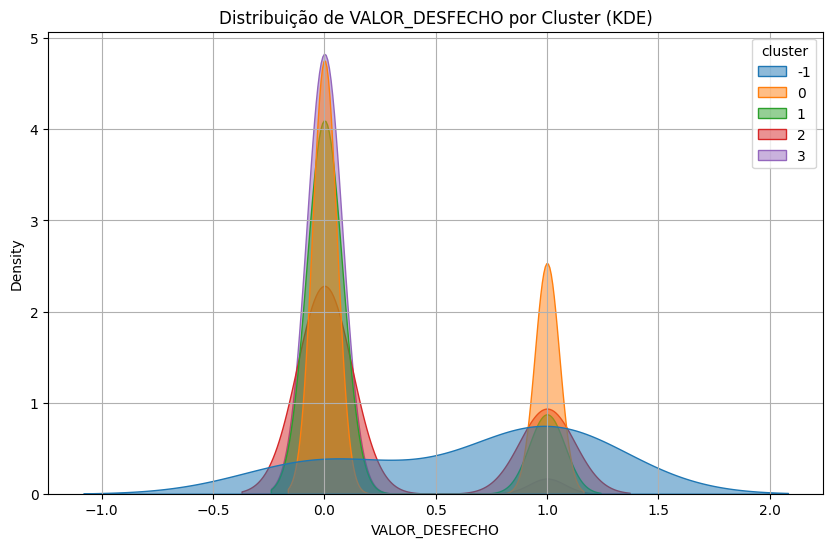

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_com_cluster,
    x='VALOR_DESFECHO',
    hue='cluster',
    fill=True,
    common_norm=False,
    palette='tab10',
    alpha=0.5
)
plt.title("Distribui√ß√£o de VALOR_DESFECHO por Cluster (KDE)")
plt.xlabel("VALOR_DESFECHO")
plt.grid(True)
plt.show()


C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\1566792469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_com_cluster, x='cluster', y='VALOR_DESFECHO', palette='Set3', inner='quartile')


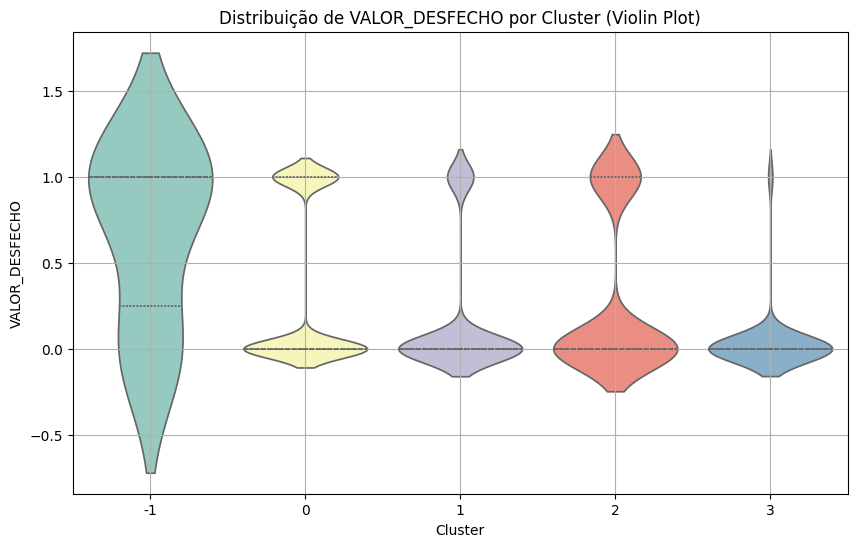

In [182]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_com_cluster, x='cluster', y='VALOR_DESFECHO', palette='Set3', inner='quartile')
plt.title("Distribui√ß√£o de VALOR_DESFECHO por Cluster (Violin Plot)")
plt.xlabel("Cluster")
plt.ylabel("VALOR_DESFECHO")
plt.grid(True)
plt.show()


In [183]:
procedimentos = [col for col in df_com_cluster.columns if col.startswith("PROCEDIMENTO_INICIAL_")]

# Para cada procedimento, calcular a m√©dia do desfecho onde foi aplicado
media_desfecho_por_procedimento = {
    proc: df_com_cluster[df_com_cluster[proc] == 1]['VALOR_DESFECHO'].mean()
    for proc in procedimentos
}

# Converter em DataFrame
import pandas as pd

df_procedimento_desfecho = pd.DataFrame.from_dict(
    media_desfecho_por_procedimento, orient='index', columns=['media_valor_desfecho']
).sort_values(by='media_valor_desfecho', ascending=False)

print(df_procedimento_desfecho)


                                media_valor_desfecho
PROCEDIMENTO_INICIAL_304040029              0.468832
PROCEDIMENTO_INICIAL_304020133              0.172270
PROCEDIMENTO_INICIAL_304020141              0.124907


In [184]:
# Agrupa por cluster e procedimento, calcula m√©dia do desfecho
resultados = []

for proc in procedimentos:
    agrupado = df_com_cluster[df_com_cluster[proc] == 1].groupby('cluster')['VALOR_DESFECHO'].mean()
    for cluster, media in agrupado.items():
        resultados.append({
            'procedimento': proc,
            'cluster': cluster,
            'media_valor_desfecho': round(media, 2)
        })

df_proc_cluster_desfecho = pd.DataFrame(resultados)


In [185]:
# Ver top 10 custos m√©dios por procedimento + cluster
df_proc_cluster_desfecho.sort_values(by='media_valor_desfecho', ascending=False).head(10)


procedimento  cluster  media_valor_desfecho
8   PROCEDIMENTO_INICIAL_304020141       -1                  0.67
2   PROCEDIMENTO_INICIAL_304040029        2                  0.49
0   PROCEDIMENTO_INICIAL_304040029        0                  0.47
1   PROCEDIMENTO_INICIAL_304040029        1                  0.27
4   PROCEDIMENTO_INICIAL_304020133        0                  0.18
10  PROCEDIMENTO_INICIAL_304020141        1                  0.15
3   PROCEDIMENTO_INICIAL_304040029        3                  0.12
9   PROCEDIMENTO_INICIAL_304020141        0                  0.12
11  PROCEDIMENTO_INICIAL_304020141        2                  0.07
5   PROCEDIMENTO_INICIAL_304020133        1                  0.06

In [186]:
df_com_cluster['estado'] = df_com_cluster[['AP_UFMUN_SP', 'AP_UFMUN_MG']].idxmax(axis=1).str[-2:]

media_por_estado_cluster = df_com_cluster.groupby(['estado', 'cluster'])['VALOR_DESFECHO'].mean().unstack().round(2)
print(media_por_estado_cluster)


cluster    -1     0     1     2     3
estado                               
MG        NaN  0.56  0.15   NaN   NaN
SP       0.67  0.29  0.18  0.29  0.03


In [187]:
media_por_estadiamento = df_com_cluster.groupby(['AQ_ESTADI', 'cluster'])['VALOR_DESFECHO'].mean().unstack().round(2)
print(media_por_estadiamento)


cluster     -1     0     1     2     3
AQ_ESTADI                             
0          NaN  0.07  0.02  0.00  0.00
1          0.0  0.16  0.18  0.12   NaN
2          NaN  0.41  0.26  0.22  0.00
3          0.8  0.36  0.17  0.30  0.04
4          NaN  0.29  0.21  0.36  0.00


M√©dia do VALOR_DESFECHO por Fluorouracila:
 FLUOROURACILA
0    0.346628
1    0.173241
Name: VALOR_DESFECHO, dtype: float64


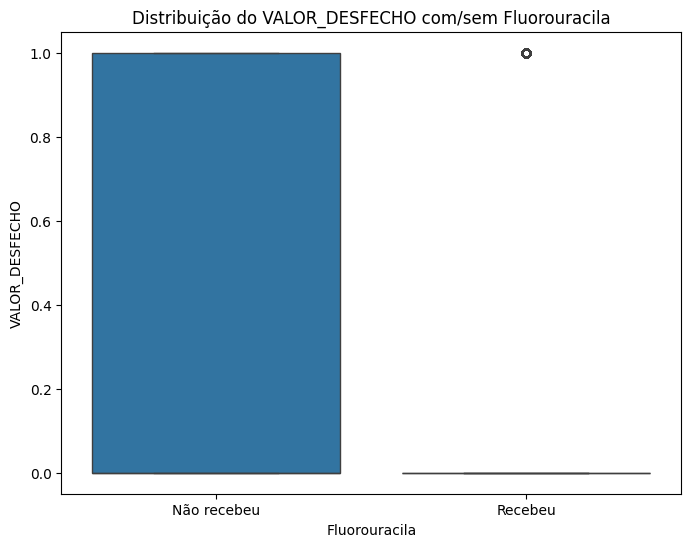

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# M√©dia de VALOR_DESFECHO por Fluorouracila
media_fluoro = df_com_cluster.groupby('FLUOROURACILA')['VALOR_DESFECHO'].mean()
print("M√©dia do VALOR_DESFECHO por Fluorouracila:\n", media_fluoro)

# Visualiza√ß√£o da distribui√ß√£o
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_com_cluster, x='FLUOROURACILA', y='VALOR_DESFECHO')
plt.xticks([0, 1], ['N√£o recebeu', 'Recebeu'])
plt.title("Distribui√ß√£o do VALOR_DESFECHO com/sem Fluorouracila")
plt.ylabel("VALOR_DESFECHO")
plt.xlabel("Fluorouracila")
plt.show()


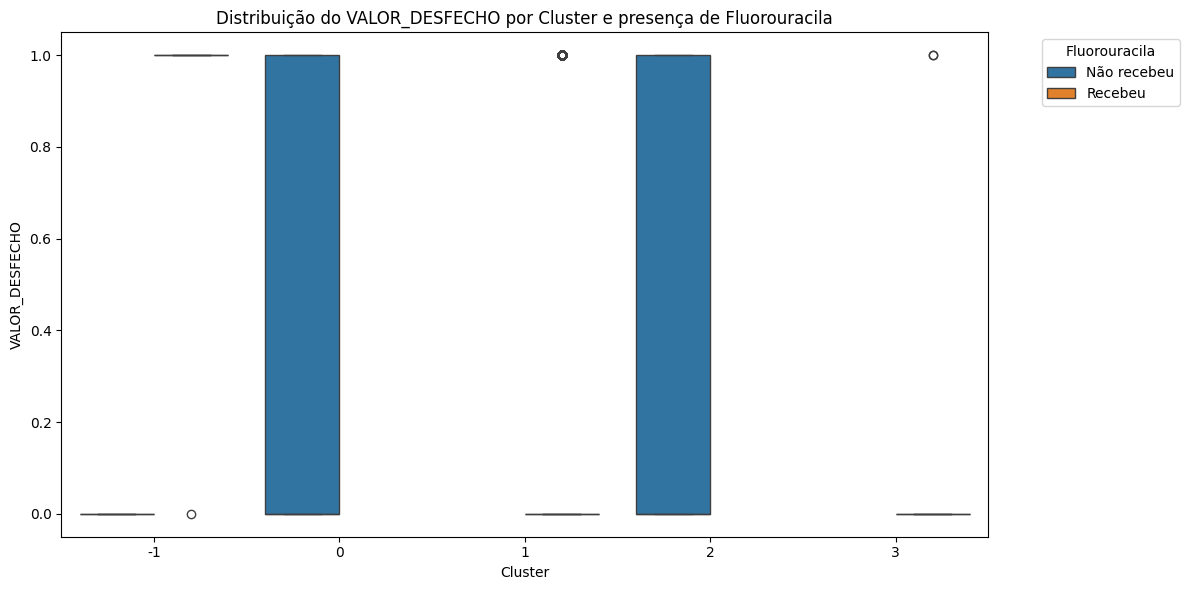

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='cluster', y='VALOR_DESFECHO', hue='FLUOROURACILA', data=df_com_cluster)

handles, labels = ax.get_legend_handles_labels()
labels = ['N√£o recebeu', 'Recebeu']
ax.legend(handles, labels, title='Fluorouracila', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Distribui√ß√£o do VALOR_DESFECHO por Cluster e presen√ßa de Fluorouracila")
plt.xlabel("Cluster")
plt.ylabel("VALOR_DESFECHO")

plt.xticks(rotation=0)  # Ajusta a rota√ß√£o do eixo X para melhor alinhamento
plt.tight_layout()      # Ajusta layout para evitar corte e desalinhamento

plt.show()


M√©dia do VALOR_DESFECHO por AP_MOTSAI:
 AP_MOTSAI
51    0.744056
28    0.564506
21    0.323888
18    0.220721
26    0.176471
31    0.166667
15    0.159322
16    0.047619
12    0.028571
23    0.000000
11    0.000000
22    0.000000
27    0.000000
41    0.000000
42    0.000000
43    0.000000
Name: VALOR_DESFECHO, dtype: float64


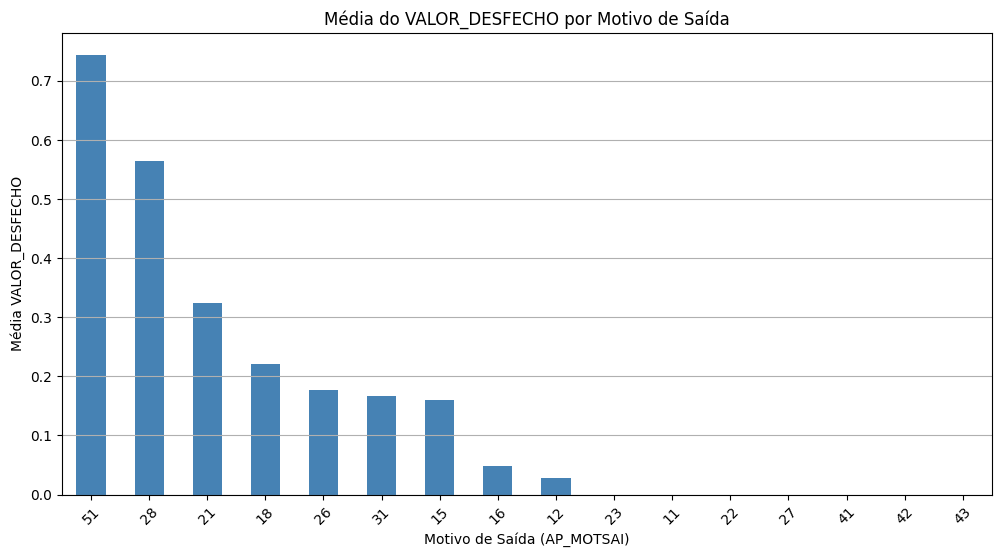

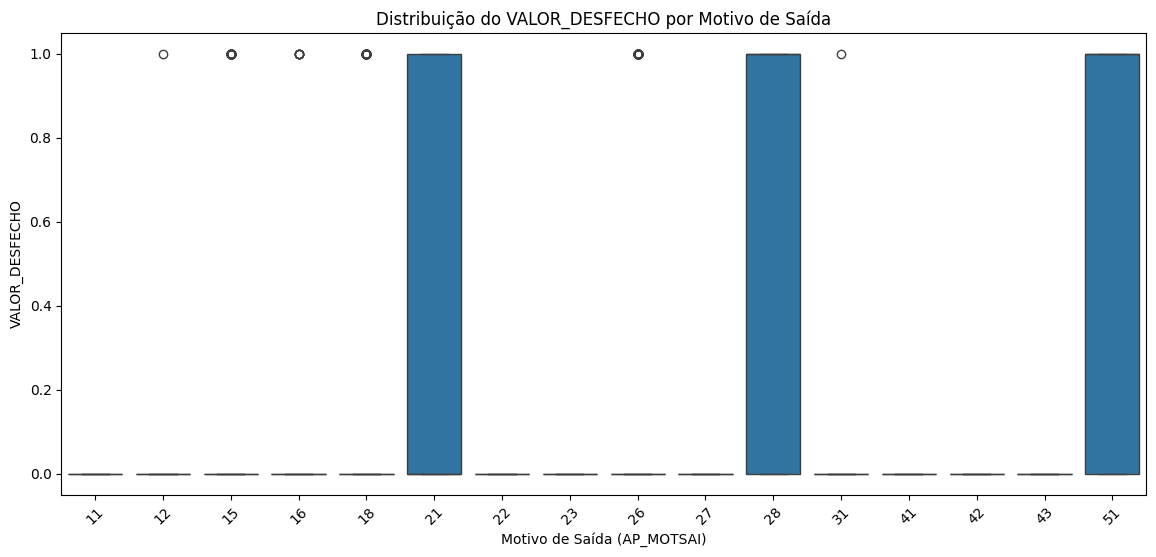

In [192]:
# M√©dia por motivo de sa√≠da
media_motivo_saida = df_com_cluster.groupby('AP_MOTSAI')['VALOR_DESFECHO'].mean().sort_values(ascending=False)
print("M√©dia do VALOR_DESFECHO por AP_MOTSAI:\n", media_motivo_saida)

# Visualiza√ß√£o da m√©dia por categoria
plt.figure(figsize=(12, 6))
media_motivo_saida.plot(kind='bar', color='steelblue')
plt.title("M√©dia do VALOR_DESFECHO por Motivo de Sa√≠da")
plt.ylabel("M√©dia VALOR_DESFECHO")
plt.xlabel("Motivo de Sa√≠da (AP_MOTSAI)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Boxplot para visualizar distribui√ß√£o
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_com_cluster, x='AP_MOTSAI', y='VALOR_DESFECHO')
plt.title("Distribui√ß√£o do VALOR_DESFECHO por Motivo de Sa√≠da")
plt.xlabel("Motivo de Sa√≠da (AP_MOTSAI)")
plt.ylabel("VALOR_DESFECHO")
plt.xticks(rotation=45)
plt.show()


Acur√°cia treino: 1.000
Acur√°cia teste: 1.000


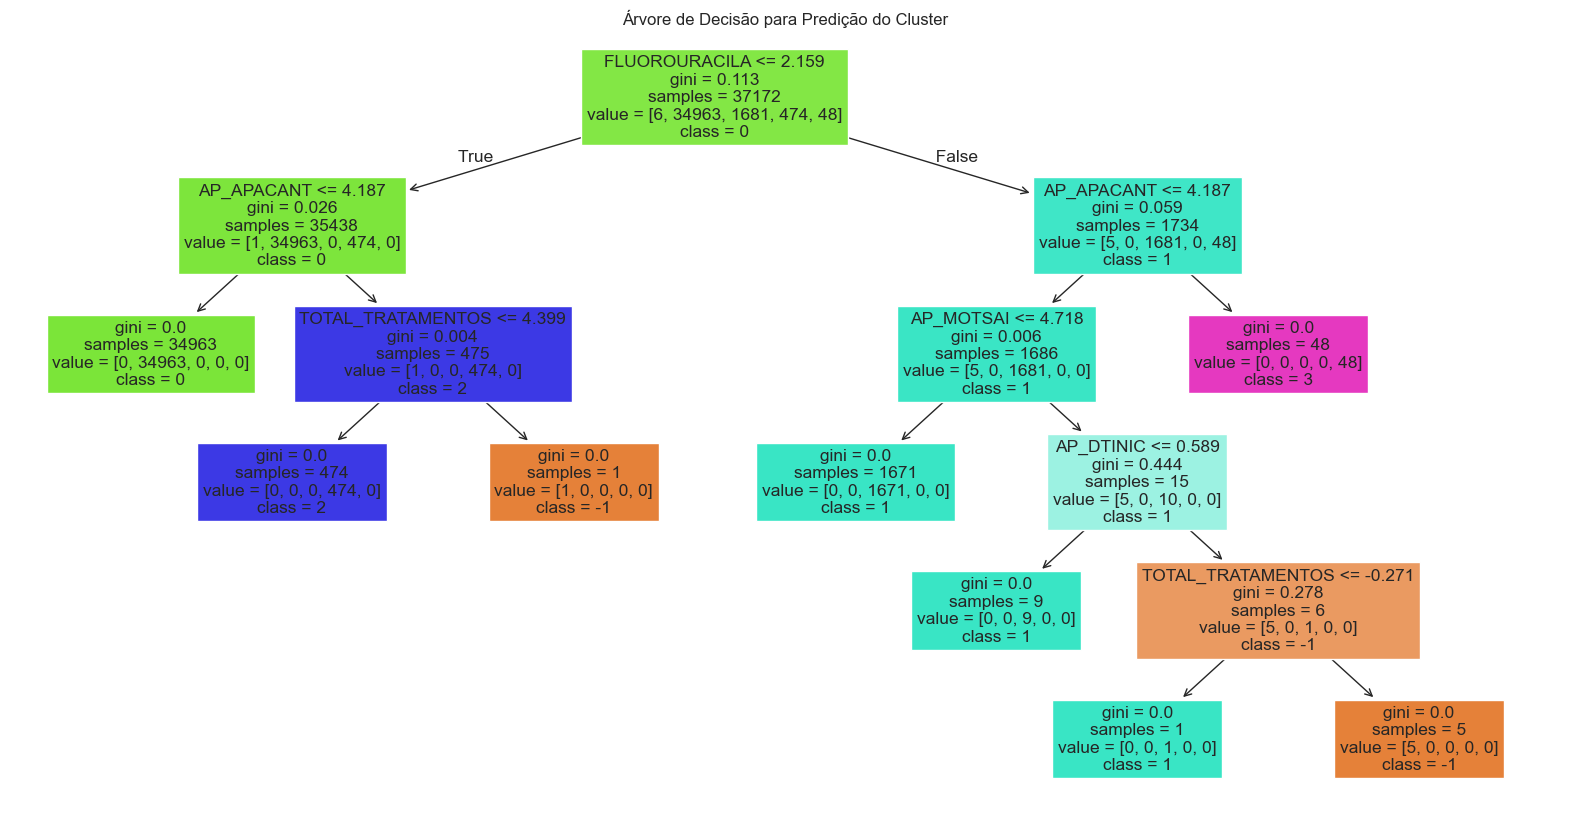

Import√¢ncia das features:
 FLUOROURACILA                     0.752573
AP_APACANT                        0.244581
AP_DTINIC                         0.001189
TOTAL_TRATAMENTOS                 0.000871
AP_MOTSAI                         0.000786
AP_UFMUN_MG                       0.000000
AP_UFMUN_SP                       0.000000
PROCEDIMENTO_INICIAL_304040029    0.000000
AP_DTFIM                          0.000000
PROCEDIMENTO_INICIAL_304020133    0.000000
AQ_ESTADI                         0.000000
PROCEDIMENTO_INICIAL_304020141    0.000000
VALOR_DESFECHO                    0.000000
dtype: float64


In [215]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Preparar os dados
df_model = df_com_cluster.copy()

# Converte datas para n√∫meros (timestamp em segundos)
df_model['AP_DTINIC'] = pd.to_datetime(df_model['AP_DTINIC']).astype('int64') / 1e9
df_model['AP_DTFIM'] = pd.to_datetime(df_model['AP_DTFIM']).astype('int64') / 1e9

# Vari√°veis para usar como features
features = [
    'AP_DTINIC',
    'AP_DTFIM',
    'PROCEDIMENTO_INICIAL_304040029',
    'AP_UFMUN_SP',
    'AP_UFMUN_MG',
    'PROCEDIMENTO_INICIAL_304020133',
    'AP_APACANT',
    'TOTAL_TRATAMENTOS',
    'AP_MOTSAI',
    'AQ_ESTADI',
    'PROCEDIMENTO_INICIAL_304020141',
    'FLUOROURACILA',
    'VALOR_DESFECHO'
]

X = df_model[features]
y = df_model['cluster']

# Escala os dados (opcional, mas recomendado para alguns algoritmos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide treino e teste para avaliar performance
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Cria o classificador de √°rvore de decis√£o
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Avalia acur√°cia
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print(f"Acur√°cia treino: {acc_train:.3f}")
print(f"Acur√°cia teste: {acc_test:.3f}")

# Visualiza a √°rvore
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=[str(c) for c in clf.classes_], filled=True)
plt.title("√Årvore de Decis√£o para Predi√ß√£o do Cluster")
plt.show()

# Import√¢ncia das features
importancias = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("Import√¢ncia das features:\n", importancias)


Labels usados: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Class names: ['0', '1', '2', '3']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15020
           1       1.00      1.00      1.00       713
           2       1.00      1.00      1.00       187
           3       1.00      1.00      1.00        12

    accuracy                           1.00     15932
   macro avg       1.00      1.00      1.00     15932
weighted avg       1.00      1.00      1.00     15932



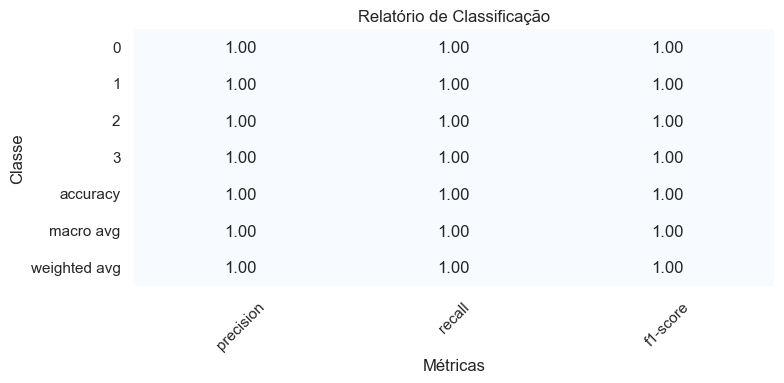

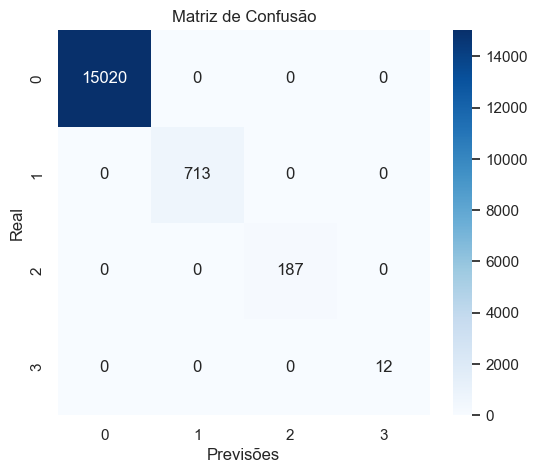

              precision  recall  f1-score  support
0                   1.0     1.0       1.0  15020.0
1                   1.0     1.0       1.0    713.0
2                   1.0     1.0       1.0    187.0
3                   1.0     1.0       1.0     12.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  15932.0
weighted avg        1.0     1.0       1.0  15932.0


In [217]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predi√ß√£o (ajuste esse c√≥digo conforme seu modelo)
y_pred = clf.predict(X_test)

# Identifica classes presentes no teste
labels = sorted(np.unique(y_test))
class_names = [str(c) for c in labels]

print("Labels usados:", labels)
print("Class names:", class_names)

# Gera relat√≥rio com labels expl√≠citos
print(classification_report(y_test, y_pred, labels=labels, target_names=class_names))

report = classification_report(y_test, y_pred, labels=labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).T

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
ax = sns.heatmap(
    df_report.drop('support', axis=1),
    annot=True,
    cmap="Blues",
    fmt='.2f',
    cbar=False,
    yticklabels=df_report.index,
    xticklabels=['precision', 'recall', 'f1-score']
)

plt.title('Relat√≥rio de Classifica√ß√£o')
plt.ylabel('Classe')
plt.xlabel('M√©tricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confus√£o")
plt.xlabel("Previs√µes")
plt.ylabel("Real")
plt.show()

print(df_report)
